# Técnica de Regressão - Grid Search

#### **Contextualização**

Neste projeto, trabalhamos com dados simulados de uma planta da empresa fictícia Amonex, responsável pela produção de cloreto de amônio (NH₄Cl) a partir da reação entre amônia (NH₃) e ácido clorídrico (HCl). Durante o processo produtivo, diversas variáveis operacionais são monitoradas, como:

* Temperatura [°C]

* Pressão [atm]

* Concentrações iniciais dos reagentes [mol/L]

* Tempo de contato dos reagentes [min]

* pH do sistema

* Agitação [rpm]

* Tempo de ocorrência de reações secundárias [min]

Além dessas variáveis, a concentração final de NH₄Cl é medida periodicamente em laboratório.

O objetivo do projeto é construir o modelo mais adequado do tipo árvore de decisão para prever a concentração final de NH₄Cl com base nas variáveis operacionais. Para isso, será realizada a sintonia de hiperparâmetros, como profundidade da árvore e número máximo de folhas, por meio da técnica de Grid Search.

A avaliação do desempenho dos modelos será feita utilizando as estratégias de validação cruzada k-fold e holdout. Após a seleção do conjunto ideal de hiperparâmetros, o modelo será reavaliado quanto à sua capacidade de generalização, utilizando novamente a técnica de holdout.

Os dados utilizados estão no arquivo df_NH4Cl.csv.

## Importar as bibliotecas necessarias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

## Importar o banco de dados

In [2]:
# Ler o banco de dados
df = pd.read_csv('df_NH4CL.csv', index_col=0)

## Analise Inicial

In [3]:
df.head()

,Temperatura [°C],Pressão [atm],Tempo de reação [min],Concentração reagente NH3 [mol/L],Concentração reagente HCL [mol/L],pH [-],Agitação [rpm],Tempo de reação secundária [min],Concentração final NH4CL [mol/L]
0,148.3804,3.4737,24.4107,0.5449,0.4237,9.1248,198.8756,23.4518,2.4489
1,87.6826,2.4574,32.2091,0.9256,0.0710,6.7798,135.9240,33.3785,2.2323
2,181.3468,4.7730,41.9314,0.7805,0.1183,4.1397,93.0442,16.0882,2.5680
3,185.8847,1.8960,26.7039,0.5684,0.0188,6.4888,130.0815,45.1920,2.4547
4,145.5968,4.1834,17.4236,0.0602,0.6668,3.5569,98.6160,12.1668,1.7893


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Temperatura [°C]                   992 non-null    float64
 1   Pressão [atm]                      992 non-null    float64
 2   Tempo de reação [min]              992 non-null    float64
 3   Concentração reagente NH3 [mol/L]  992 non-null    float64
 4   Concentração reagente HCL [mol/L]  992 non-null    float64
 5   pH [-]                             992 non-null    float64
 6   Agitação [rpm]                     992 non-null    float64
 7   Tempo de reação secundária [min]   992 non-null    float64
 8   Concentração final NH4CL [mol/L]   992 non-null    float64
dtypes: float64(9)
memory usage: 78.1 KB


In [5]:
df.describe()

,Temperatura [°C],Pressão [atm],Tempo de reação [min],Concentração reagente NH3 [mol/L],Concentração reagente HCL [mol/L],pH [-],Agitação [rpm],Tempo de reação secundária [min],Concentração final NH4CL [mol/L]
count,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000
mean,124.169438,3.462300,55.456295,0.497438,0.500446,6.814851,123.558081,30.315531,2.101288
std,43.571973,1.189169,25.883748,0.297919,0.295342,3.268965,42.890702,11.850405,0.485305
min,50.978100,1.106300,10.480200,0.000300,0.000900,1.114600,50.952300,10.220000,0.575800
25%,86.183750,2.472575,33.696225,0.231025,0.239175,3.942075,87.771025,20.173650,1.781550
50%,122.521250,3.479150,56.794600,0.510800,0.508050,6.726550,119.604000,30.375350,2.100800
75%,161.633525,4.427150,78.118600,0.759850,0.762750,9.594025,160.893400,40.428475,2.424575
max,200.519600,5.889100,100.249500,1.000000,0.999800,12.878300,200.663300,50.733300,3.519100


In [6]:
df.shape

(1000, 9)

In [7]:
df.isna().sum()

Temperatura [°C]                     8
Pressão [atm]                        8
Tempo de reação [min]                8
Concentração reagente NH3 [mol/L]    8
Concentração reagente HCL [mol/L]    8
pH [-]                               8
Agitação [rpm]                       8
Tempo de reação secundária [min]     8
Concentração final NH4CL [mol/L]     8
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.duplicated().value_counts()

False    992
Name: count, dtype: int64

## Separar as variaveis de entrada (X) e saida (y)

In [10]:
df.columns

Index(['Temperatura [°C]', 'Pressão [atm]', 'Tempo de reação [min]',
       'Concentração reagente NH3 [mol/L]',
       'Concentração reagente HCL [mol/L]', 'pH [-]', 'Agitação [rpm]',
       'Tempo de reação secundária [min]', 'Concentração final NH4CL [mol/L]'],
      dtype='object')

In [11]:
X = df.drop(['Concentração final NH4CL [mol/L]'], axis = 1)
y = df[['Concentração final NH4CL [mol/L]']]

## Divisao do banco de dados em treinamento e teste

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.78, random_state=50)

## Normalizacao dos dados de entrada e saida

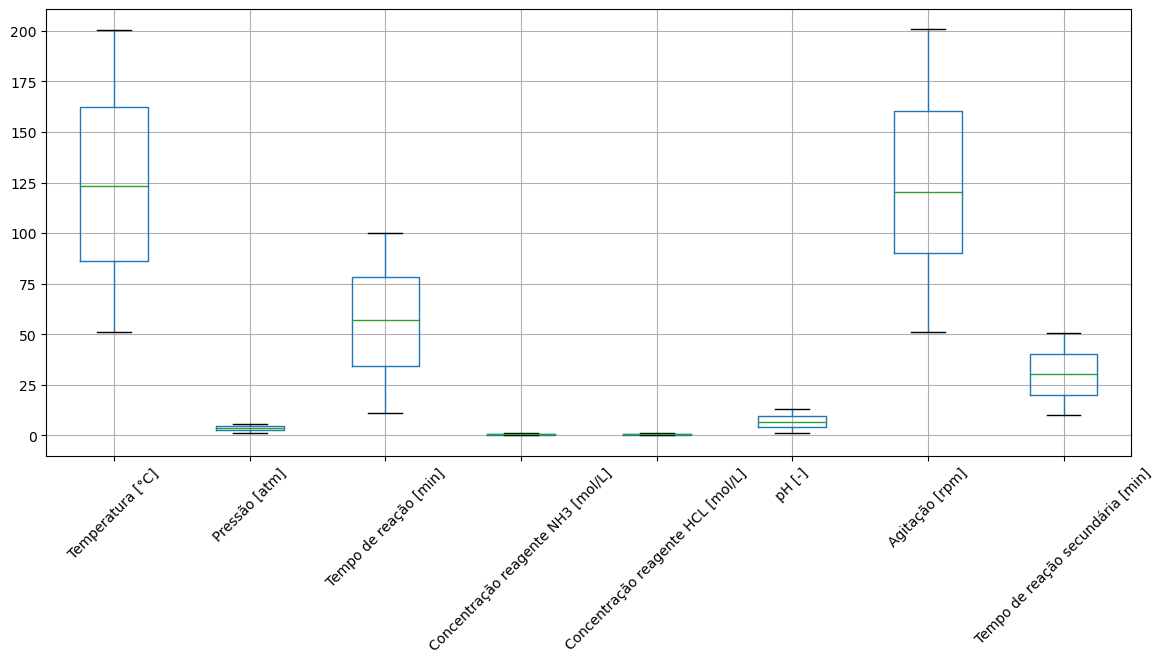

In [13]:
# Boxplot dados de entrada
X_train.boxplot(grid=True, rot=45, figsize=(14,5.8))
plt.show()

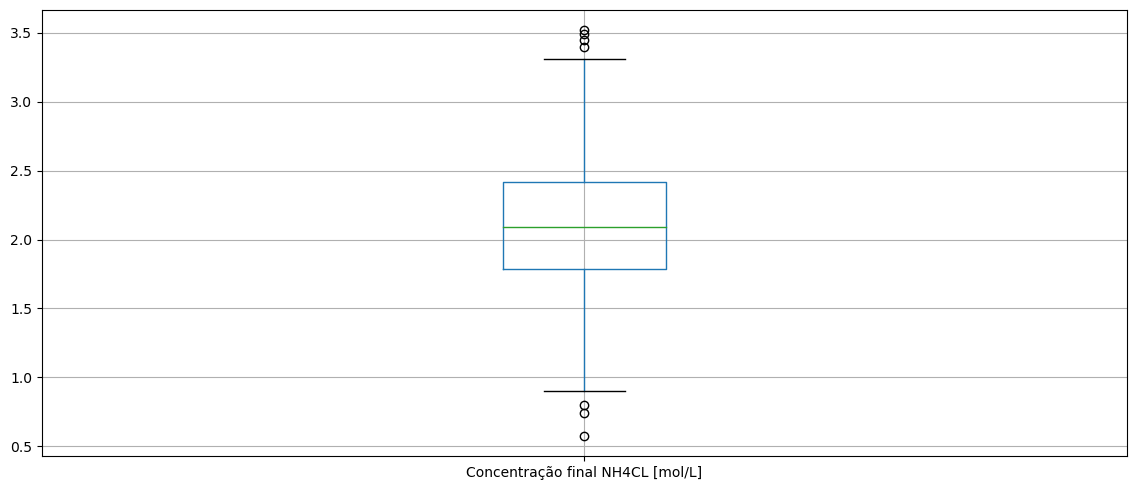

In [14]:
# Boxplot dados de saida
y_train.boxplot(grid=True, rot=0, figsize=(14,5.8))
plt.show()

In [15]:
# Normalizacao dados de entrada
scaler_input = MinMaxScaler(feature_range=(-1, 1))
scaler_input.fit(X_train)

X_train_norm = scaler_input.transform(X_train)
X_test_norm = scaler_input.transform(X_test)

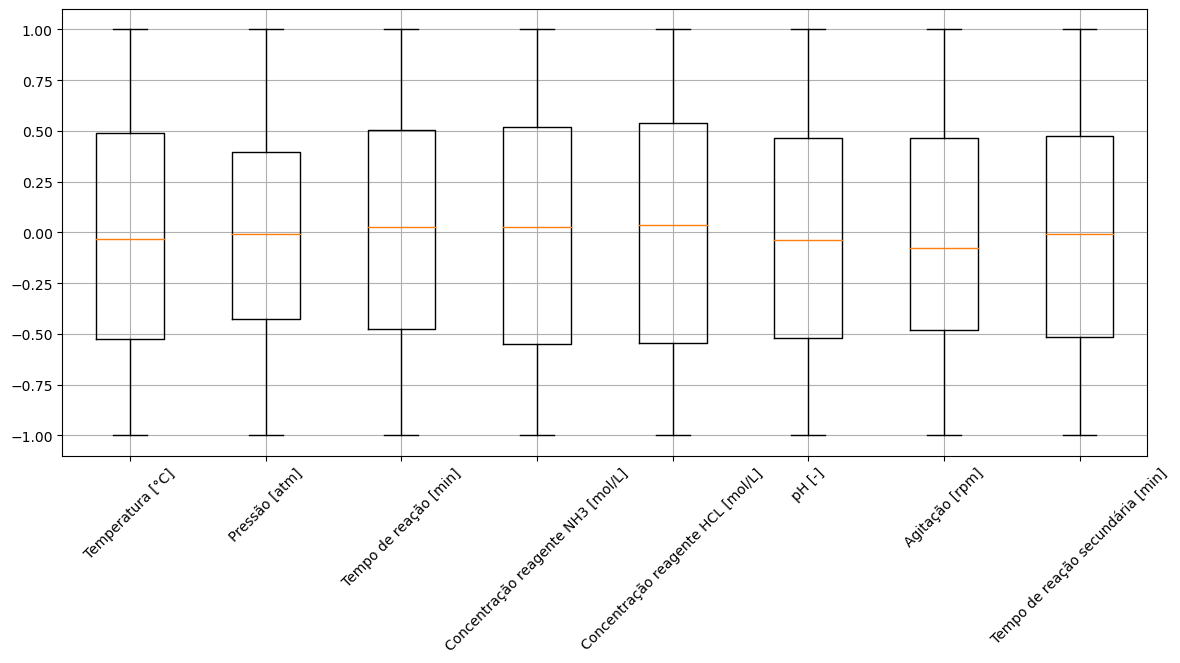

In [16]:
# Boxplot dados de entrada
plt.figure(figsize=(14,5.8))
plt.boxplot(X_train_norm)
plt.grid(True)
plt.xticks(ticks=np.arange(1, X_train_norm.shape[1]+1), labels=X.columns, rotation=45)
plt.show()

In [17]:
# Normalizacao dados de saida
scaler_output = MinMaxScaler(feature_range=(-1, 1))
scaler_output.fit(y_train)

y_train_norm = scaler_output.transform(y_train)
y_test_norm = scaler_output.transform(y_test)

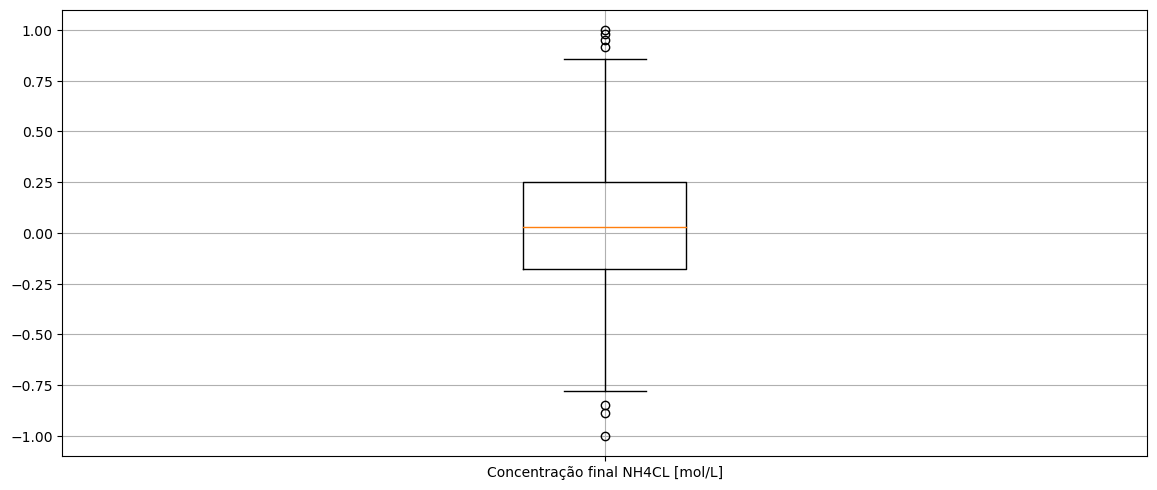

In [18]:
# Boxplot dados de saida
plt.figure(figsize=(14,5.8))
plt.boxplot(y_train_norm)
plt.grid(True)
plt.xticks(ticks=np.arange(1, y_train_norm.shape[1]+1), labels=y.columns, rotation=0)
plt.show()

## Subdivisao dos dados de treinamento

In [19]:
X_train_sint_norm, X_valid_sint_norm, y_train_sint_norm, y_valid_sint_norm = train_test_split(X_train_norm, y_train_norm,
                                                                                             train_size=0.8,
                                                                                             random_state=50)

## Analise Exploratoria dos Hiperparametros

### Analise Exploratoria 1 (grid search)

In [20]:
# Definir os valores de hiperparametros atrelados a busca em grade
max_depth = [15,16,17,18,19,20]
max_leaf_nodes = [30,31,32,33,34,35]
parameters = {'max_depth':max_depth,'max_leaf_nodes':max_leaf_nodes}

## Selecionar o Modelo de Predicao

In [21]:
# Construir a grade de busca
param_grid = ParameterGrid(parameters)
param_grid = list(param_grid)

In [22]:
# Criar um dataframe para armazenar os valores calculados de metrica de desempenho
scores_df = pd.DataFrame(index=max_leaf_nodes, columns=max_depth)

In [23]:
# Executar a busca em grade em conjunto com a tecnica holdout
for param in param_grid:
    model = DecisionTreeRegressor(random_state=50, **param)
    model.fit(X_train_sint_norm, y_train_sint_norm)
    y_pred_valid_sint_norm = model.predict(X_valid_sint_norm)
    mse = mean_squared_error(y_valid_sint_norm, y_pred_valid_sint_norm)
    scores_df.loc[param['max_leaf_nodes'], param['max_depth']] = mse

In [24]:
# Reestruturar os valores do dataframe a fim de construir o mapa de calor (heatmap)
for label in scores_df.columns:
    scores_df[label] = pd.to_numeric(scores_df[label])

In [25]:
# Visualizar o dataframe construido com os valores de metrica resultantes da busca em grade
scores_df.head(6)

,15,16,17,18,19,20
30,0.124549,0.124549,0.124549,0.124549,0.124549,0.124549
31,0.127373,0.127373,0.127373,0.127373,0.127373,0.127373
32,0.128319,0.128319,0.128319,0.128319,0.128319,0.128319
33,0.132089,0.132089,0.132089,0.132089,0.132089,0.132089
34,0.132067,0.132067,0.132067,0.132067,0.132067,0.132067
35,0.132030,0.132030,0.132030,0.132030,0.132030,0.132030


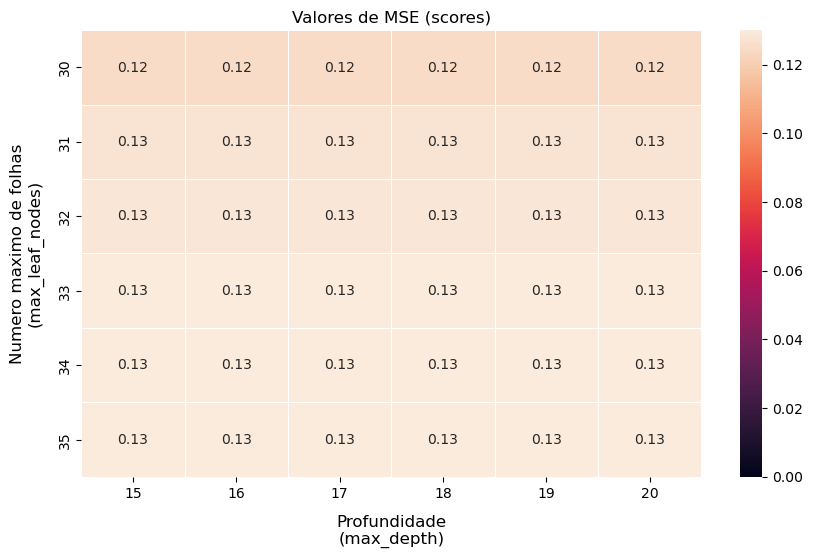

In [26]:
# Heatmap
plt.figure(figsize=(10,5.8))
ax = sns.heatmap(scores_df, annot=True, fmt='.2f', linewidths=0.6, vmin=0.0, vmax=0.13, cbar=True)
ax.set_title('Valores de MSE (scores)', fontsize=12)
ax.set_ylabel(ylabel='Numero maximo de folhas\n(max_leaf_nodes)', fontsize=12, labelpad=10)
ax.set_xlabel(xlabel='Profundidade\n(max_depth)', fontsize=12, labelpad=10)
plt.show()

### Analise Exploratoria 2 (grid search)

In [27]:
# Definir os valores de hiperparametros atrelados a busca em grade
max_depth = [1,2,3,4,5,6]
max_leaf_nodes = [2,5,10,15,20,25]
parameters = {'max_depth':max_depth, 'max_leaf_nodes':max_leaf_nodes}

In [28]:
# Construir a grade em busca
param_grid = list(ParameterGrid(parameters))

In [29]:
# Criar um dataframe para armazenar os valores calculados de metrica de desempenho
scores_df = pd.DataFrame(index=max_leaf_nodes, columns=max_depth)

In [30]:
# Executar a busca em grade em conjunto com a tecnica holdout
for param in param_grid:
    model = DecisionTreeRegressor(random_state=50, **param)
    model.fit(X_train_sint_norm, y_train_sint_norm)
    y_pred_valid_sint_norm = model.predict(X_valid_sint_norm)
    mse = mean_squared_error(y_valid_sint_norm, y_pred_valid_sint_norm)
    scores_df.loc[param['max_leaf_nodes'], param['max_depth']] = mse

In [31]:
# Reestruturar os valores do dataframe a fim de construir o mapa de calor (heatmap):
for label in scores_df.columns:
    scores_df[label] = pd.to_numeric(scores_df[label])

In [32]:
scores_df.head(6)

,1,2,3,4,5,6
2,0.097853,0.097853,0.097853,0.097853,0.097853,0.097853
5,0.097853,0.098044,0.100763,0.102579,0.102579,0.102579
10,0.097853,0.098044,0.100725,0.100788,0.099588,0.106264
15,0.097853,0.098044,0.100725,0.100788,0.107435,0.108607
20,0.097853,0.098044,0.100725,0.100788,0.107435,0.112390
25,0.097853,0.098044,0.100725,0.100788,0.107435,0.110581


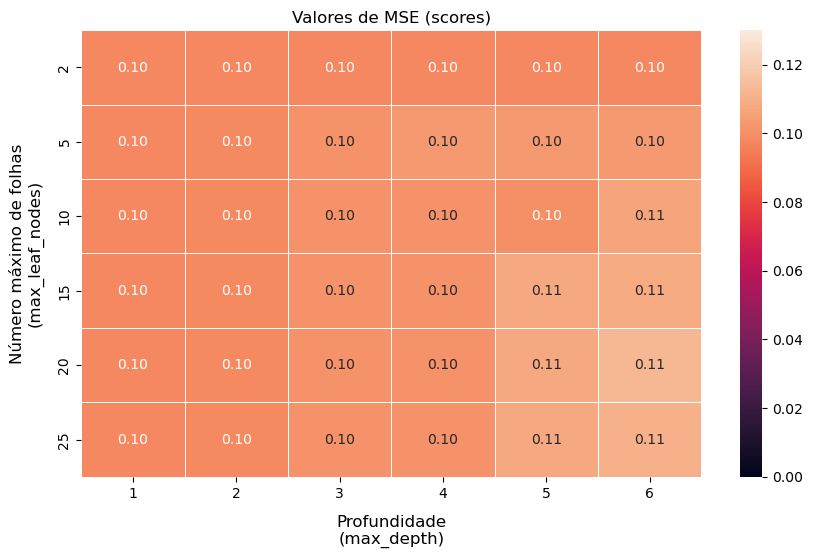

In [33]:
# Heatmap
plt.figure(figsize=(10,5.8))
ax = sns.heatmap(scores_df, annot=True, fmt='.2f', linewidths=0.6, vmin=0.0, vmax=0.13, cbar=True)
ax.set_title('Valores de MSE (scores)', fontsize=12)
ax.set_ylabel(ylabel='Número máximo de folhas\n(max_leaf_nodes)', fontsize=12, labelpad=10)
ax.set_xlabel(xlabel='Profundidade\n(max_depth)', fontsize=12, labelpad=10)
plt.show()

### Analise Exploratoria 3 (grid search)

In [34]:
# Definir os valores de hiperparametros atrelados a busca em grade
max_depth = [1,10,20,30,40,50,60]
max_leaf_nodes = [2,10,20,40,50,60]
parameters = {'max_depth':max_depth,'max_leaf_nodes':max_leaf_nodes}


In [35]:
# Construir a grade de busca
param_grid = list(ParameterGrid(parameters))

In [36]:
scores_df

,1,2,3,4,5,6
2,0.097853,0.097853,0.097853,0.097853,0.097853,0.097853
5,0.097853,0.098044,0.100763,0.102579,0.102579,0.102579
10,0.097853,0.098044,0.100725,0.100788,0.099588,0.106264
15,0.097853,0.098044,0.100725,0.100788,0.107435,0.108607
20,0.097853,0.098044,0.100725,0.100788,0.107435,0.112390
25,0.097853,0.098044,0.100725,0.100788,0.107435,0.110581


In [37]:
# Criar um dataframe para armazenar os valores calculados de metrica de desempenho
scores_df = pd.DataFrame(index=max_leaf_nodes, columns=max_depth)

In [38]:
# Executar a busca em grade em conjunto com a tecnica holdout
for param in param_grid:
    model = DecisionTreeRegressor(random_state=50, **param)
    model.fit(X_train_sint_norm, y_train_sint_norm)
    y_pred_valid_sint_norm = model.predict(X_valid_sint_norm)
    
    mse = mean_squared_error(y_valid_sint_norm, y_pred_valid_sint_norm)
    scores_df.loc[param['max_leaf_nodes'], param['max_depth']] = mse

In [39]:
# Reestruturar os valores do df a fim de construir o heatmap
for label in scores_df.columns:
    scores_df[label] = pd.to_numeric(scores_df[label])

In [40]:
scores_df.head(6)

,1,10,20,30,40,50,60
2,0.097853,0.097853,0.097853,0.097853,0.097853,0.097853,0.097853
10,0.097853,0.106264,0.106264,0.106264,0.106264,0.106264,0.106264
20,0.097853,0.111768,0.111768,0.111768,0.111768,0.111768,0.111768
40,0.097853,0.122685,0.131916,0.131916,0.131916,0.131916,0.131916
50,0.097853,0.123226,0.138211,0.138211,0.138211,0.138211,0.138211
60,0.097853,0.123001,0.134648,0.134648,0.134648,0.134648,0.134648


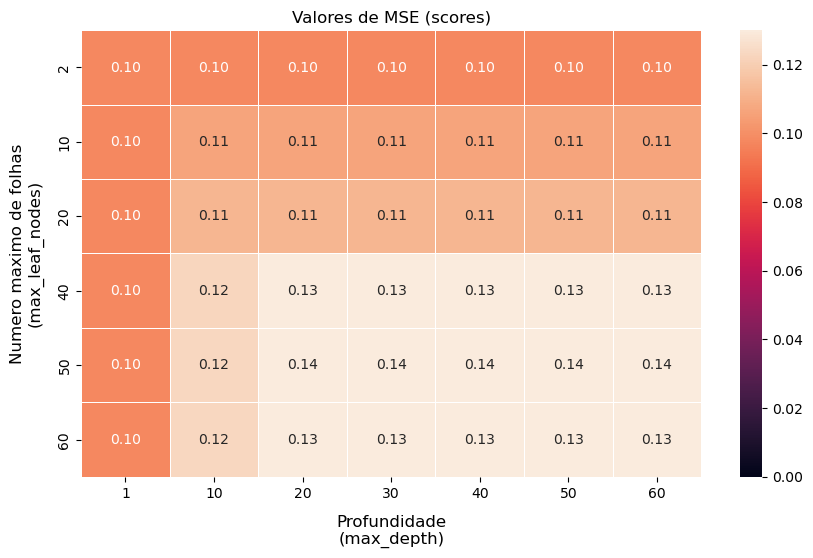

In [41]:
# Heatmap
plt.figure(figsize=(10,5.8))
ax = sns.heatmap(scores_df, annot=True, fmt='.2f', linewidths=0.6, vmin=0.0, vmax=0.13, cbar=True)
ax.set_title('Valores de MSE (scores)', fontsize=12)
ax.set_ylabel(ylabel='Numero maximo de folhas\n(max_leaf_nodes)',fontsize=12, labelpad=10)
ax.set_xlabel(xlabel='Profundidade\n(max_depth)',fontsize=12, labelpad=10)
plt.show()

4.1.2 - Definição do possível melhor conjunto de hiperparâmetros via busca em grade (*grid search*) com técnica *holdout*:

In [42]:
# Definir os valores de hiperparametros atrelados a busca em grade
max_depth = [1]
max_leaf_nodes = [2]
parameters = {'max_depth':max_depth,'max_leaf_nodes':max_leaf_nodes}

In [43]:
# Construir a grade de busca
param_grid = list(ParameterGrid(parameters))

In [44]:
# Criar um df para armazenar os valores calculados de metrica de desempenho
scores_df = pd.DataFrame(index=max_leaf_nodes, columns=max_depth)

In [45]:
# Executar a busca em grade em conjunto com a tecnica holdout
for param in param_grid:
    model = DecisionTreeRegressor(random_state=50, **param)
    model.fit(X_train_sint_norm,y_train_sint_norm)
    y_pred_valid_sint_norm = model.predict(X_valid_sint_norm)
    
    mse = mean_squared_error(y_valid_sint_norm,y_pred_valid_sint_norm)
    scores_df.loc[param['max_leaf_nodes'], param['max_depth']] = mse

In [46]:
# Reestruturar os valores do df a fim de construir o heatmap
for label in scores_df.columns:
    scores_df[label] = pd.to_numeric(scores_df[label])

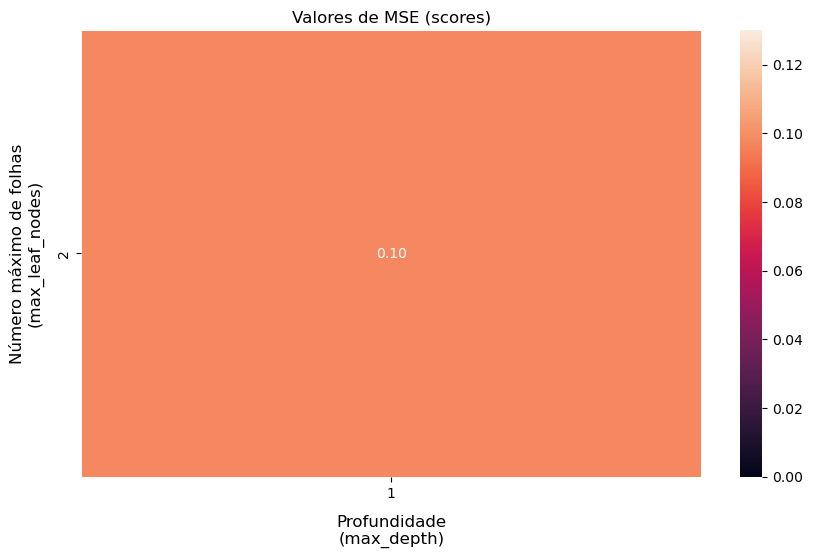

In [47]:
#  Heatmap
plt.figure(figsize=(10,5.8))
ax = sns.heatmap(scores_df, annot=True, fmt='.2f', linewidths=0.6, vmin=0.0, vmax=0.13, cbar=True)
ax.set_title('Valores de MSE (scores)', fontsize=12)
ax.set_ylabel(ylabel='Número máximo de folhas\n(max_leaf_nodes)', fontsize=12, labelpad=10)
ax.set_xlabel(xlabel='Profundidade\n(max_depth)', fontsize=12, labelpad=10)
plt.show()

### 4.2 - Busca em grade (*grid search*) com técnica *k-fold cross validation*

* O comando computacional [```GridSearchCV()``` da biblioteca *scikit-learn*](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) será utilizado para viabilizar implementar a busca em grade (*grid search*) com validação cruzada (*cross validation*) em linguagem de programação *Python*.

* Para utilizar o comando computacional ```GridSearchCV()``` na tarefa de regressão em evidência neste exemplo, faz-se necessário definir os seguintes parâmetros: o tipo de modelo de regressão (```estimator```); os valores dos hiperparâmetros do modelo de predição que devem compor a grade de busca (```param_grid```); os dados de saída (```y```); a métrica de desempenho (```scoring```); e o número de partições *k* (```cv```). A seguir encontra-se evidenciado como esses parâmetros são definidos no ```GridSearchCV()```:

```python
            GridSearchCV(estimator,
                         param_grid,                                         
                         scoring=None,
                         cv=None)
```

### Analise exploratoria dos hiperparametros

* Será realizada uma análise exploratória dos hiperparâmetros a fim de comparar os resultados obtidos nessa etapa com os resultados obtidos via busca em grade (*grid search*) com técnica *holdout*.

### Análise exploratória 01 (busca em grade)

In [48]:
# Definir os valores de hiperparâmetros atrelados à busca em grade
max_depth = [15,16,17,18,19,20]
max_leaf_nodes = [30,31,32,33,34,35]
parameters = {'max_depth':max_depth, "max_leaf_nodes":max_leaf_nodes}

In [49]:
# Criar um dataframe para armazenar aos valores calculados de métrica de desempenho
scores_df = pd.DataFrame(index=max_leaf_nodes, columns=max_depth)

In [50]:
# Instanciar o tipo de modelo de predição - árvore de decisão para regressão
model = DecisionTreeRegressor(random_state=50)

In [51]:
# Executar a busca em grade em conjunto com a tecnica k-fold cross validation
grid_search = GridSearchCV(estimator=model, param_grid=parameters, scoring='neg_mean_squared_error', cv=10)
grid_search.fit(X_train_norm, y_train_norm)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=50),
             param_grid={'max_depth': [15, 16, 17, 18, 19, 20],
                         'max_leaf_nodes': [30, 31, 32, 33, 34, 35]},
             scoring='neg_mean_squared_error')

In [52]:
# Acessar os hiperparâmetros mais adequados segundo o valor médio da métrica de erro (MSE)
grid_search.best_params_

{'max_depth': 16, 'max_leaf_nodes': 31}

In [53]:
# Acessar o valor médio da métrica de erro atrelado aos hiperparâmetros mais adequados:
grid_search.best_score_

-0.1410331198768775

In [54]:
# Salvar em um dataframe todas as informações atreladas à busca em grade
info_grid_search = pd.DataFrame.from_dict(grid_search.cv_results_)

In [55]:
# Criar um dataframe a fim de criar um mapa de calor
scores_df = pd.DataFrame()
scores_df['param_max_depth'] = pd.to_numeric(info_grid_search['param_max_depth'].values)
scores_df['param_max_leaf_nodes'] = pd.to_numeric(info_grid_search['param_max_leaf_nodes'].values)
scores_df['mean_test_score'] = -pd.to_numeric(info_grid_search['mean_test_score'].values)
scores_df = scores_df.pivot(index='param_max_leaf_nodes', columns='param_max_depth', values='mean_test_score')

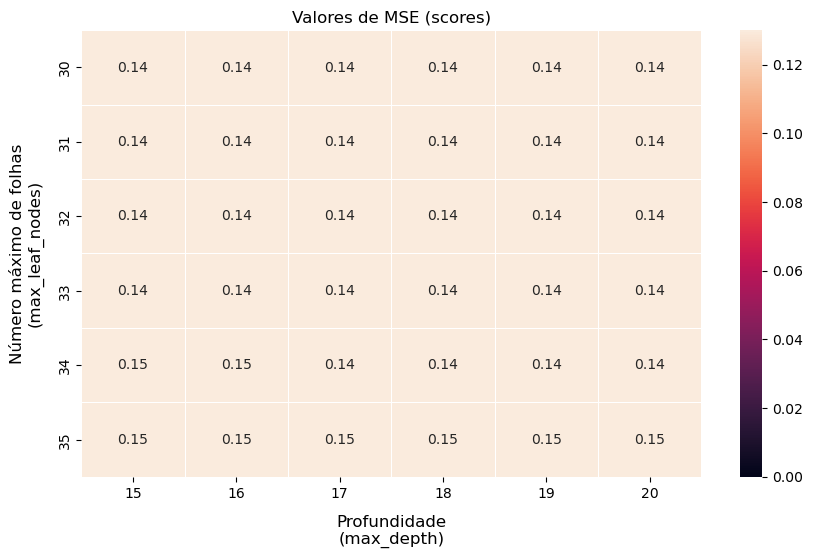

In [56]:
# Criar uma figura do tipo mapa de calor (heatmap)
plt.figure(figsize=(10,5.8))
ax = sns.heatmap(scores_df, annot=True, fmt='.2f', linewidths=0.6, vmin=0.0, vmax=0.13, cbar=True)
ax.set_title('Valores de MSE (scores)', fontsize=12)
ax.set_ylabel(ylabel='Número máximo de folhas\n(max_leaf_nodes)', fontsize=12, labelpad=10)
ax.set_xlabel(xlabel='Profundidade\n(max_depth)', fontsize=12, labelpad=10)
plt.show()

### Análise exploratória 02 (busca em grade)

In [57]:
# Definir os valores de hiperparâmetros atrelados à busca em grade
max_depth = [1, 2, 3, 4, 5, 6]
max_leaf_nodes = [2, 5, 10, 15, 20, 25]
parameters = {'max_depth':max_depth, "max_leaf_nodes":max_leaf_nodes}

In [58]:
# Criar um dataframe para armazenar aos valores calculados de métrica de desempenho
scores_df = pd.DataFrame(index=max_leaf_nodes, columns=max_depth)

In [59]:
# Instanciar o tipo de modelo de predição - árvore de decisão para regressão
model = DecisionTreeRegressor(random_state=50)

In [60]:
# Executar a busca em grade em conjunto com a tecnica k-fold cross validation
grid_search = GridSearchCV(estimator=model, param_grid=parameters, scoring='neg_mean_squared_error', cv=10)
grid_search.fit(X_train_norm, y_train_norm)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=50),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_leaf_nodes': [2, 5, 10, 15, 20, 25]},
             scoring='neg_mean_squared_error')

In [61]:
# Acessar os hiperparâmetros mais adequados segundo o valor médio da métrica de erro (MSE)
grid_search.best_params_

{'max_depth': 1, 'max_leaf_nodes': 2}

In [62]:
# Acessar o valor médio da métrica de erro atrelado aos hiperparâmetros mais adequados:
grid_search.best_score_

-0.10748313060627582

In [63]:
# Salvar em um dataframe todas as informações atreladas à busca em grade
info_grid_search = pd.DataFrame.from_dict(grid_search.cv_results_)

In [64]:
# Criar um dataframe a fim de criar um mapa de calor
scores_df = pd.DataFrame()
scores_df['param_max_depth'] = pd.to_numeric(info_grid_search['param_max_depth'].values)
scores_df['param_max_leaf_nodes'] = pd.to_numeric(info_grid_search['param_max_leaf_nodes'].values)
scores_df['mean_test_score'] = -pd.to_numeric(info_grid_search['mean_test_score'].values)
scores_df = scores_df.pivot(index='param_max_leaf_nodes', columns='param_max_depth', values='mean_test_score')

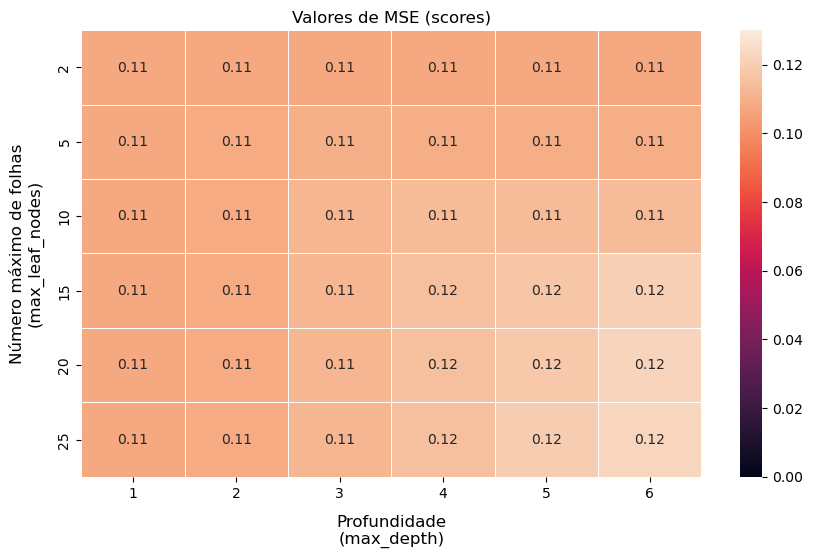

In [65]:
# Criar uma figura do tipo mapa de calor (heatmap)
plt.figure(figsize=(10,5.8))
ax = sns.heatmap(scores_df, annot=True, fmt='.2f', linewidths=0.6, vmin=0.0, vmax=0.13, cbar=True)
ax.set_title('Valores de MSE (scores)', fontsize=12)
ax.set_ylabel(ylabel='Número máximo de folhas\n(max_leaf_nodes)', fontsize=12, labelpad=10)
ax.set_xlabel(xlabel='Profundidade\n(max_depth)', fontsize=12, labelpad=10)
plt.show()

### Análise exploratória 03 (busca em grade)

In [66]:
# Definir os valores de hiperparâmetros atrelados à busca em grade
max_depth = [1, 10, 20, 30, 40, 50, 60]
max_leaf_nodes = [2, 10, 20, 40, 50, 60]
parameters = {'max_depth':max_depth, "max_leaf_nodes":max_leaf_nodes}

In [67]:
# Criar um dataframe para armazenar aos valores calculados de métrica de desempenho
scores_df = pd.DataFrame(index=max_leaf_nodes, columns=max_depth)

In [68]:
# Instanciar o tipo de modelo de predição - árvore de decisão para regressão
model = DecisionTreeRegressor(random_state=50)

In [69]:
# Executar a busca em grade em conjunto com a tecnica k-fold cross validation
grid_search = GridSearchCV(estimator=model, param_grid=parameters, scoring='neg_mean_squared_error', cv=10)
grid_search.fit(X_train_norm, y_train_norm)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=50),
             param_grid={'max_depth': [1, 10, 20, 30, 40, 50, 60],
                         'max_leaf_nodes': [2, 10, 20, 40, 50, 60]},
             scoring='neg_mean_squared_error')

In [70]:
# Acessar os hiperparâmetros mais adequados segundo o valor médio da métrica de erro (MSE)
grid_search.best_params_

{'max_depth': 1, 'max_leaf_nodes': 2}

In [71]:
# Acessar o valor médio da métrica de erro atrelado aos hiperparâmetros mais adequados:
grid_search.best_score_

-0.10748313060627582

In [72]:
# Salvar em um dataframe todas as informações atreladas à busca em grade
info_grid_search = pd.DataFrame.from_dict(grid_search.cv_results_)

In [73]:
# Criar um dataframe a fim de criar um mapa de calor
scores_df = pd.DataFrame()
scores_df['param_max_depth'] = pd.to_numeric(info_grid_search['param_max_depth'].values)
scores_df['param_max_leaf_nodes'] = pd.to_numeric(info_grid_search['param_max_leaf_nodes'].values)
scores_df['mean_test_score'] = -pd.to_numeric(info_grid_search['mean_test_score'].values)
scores_df = scores_df.pivot(index='param_max_leaf_nodes', columns='param_max_depth', values='mean_test_score')

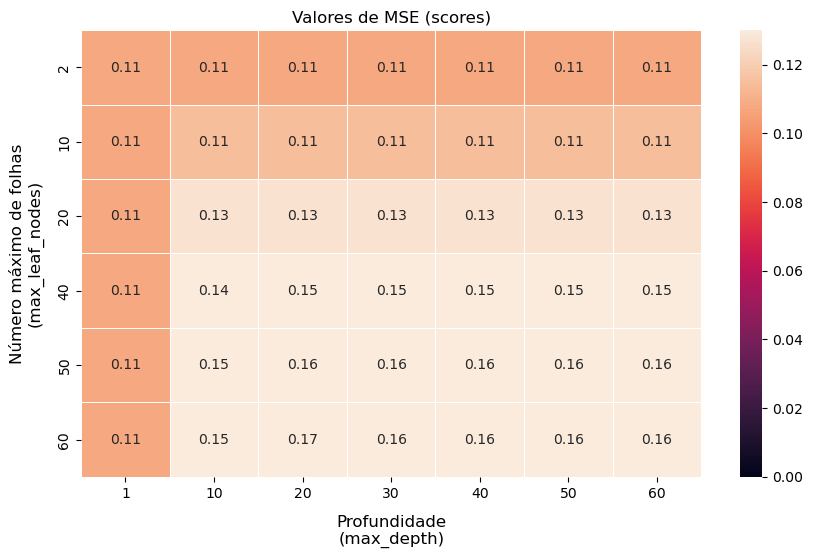

In [74]:
# Criar uma figura do tipo mapa de calor (heatmap)
plt.figure(figsize=(10,5.8))
ax = sns.heatmap(scores_df, annot=True, fmt='.2f', linewidths=0.6, vmin=0.0, vmax=0.13, cbar=True)
ax.set_title('Valores de MSE (scores)', fontsize=12)
ax.set_ylabel(ylabel='Número máximo de folhas\n(max_leaf_nodes)', fontsize=12, labelpad=10)
ax.set_xlabel(xlabel='Profundidade\n(max_depth)', fontsize=12, labelpad=10)
plt.show()

### Após definicao dos valores de hiperparâmetros

In [75]:
# Definir os valores de hiperparâmetros atrelados à busca em grade:
max_depth = [1] # definir os valores dos hiperparâmetros
max_leaf_nodes = [2] # definir os valores dos hiperparâmetros
parameters = {'max_depth':max_depth, 'max_leaf_nodes':max_leaf_nodes}

In [76]:
# Instanciar o tipo de modelo de predição - árvore de decisão para regressão:
model = DecisionTreeRegressor(random_state=50)

# Executar a busca em grade em conjunto com a técnica k-fold cross validation:
grid_search = GridSearchCV(estimator=model, param_grid=parameters, scoring='neg_mean_squared_error', cv=10)
grid_search.fit(X_train_norm, y_train_norm)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=50),
             param_grid={'max_depth': [1], 'max_leaf_nodes': [2]},
             scoring='neg_mean_squared_error')

In [77]:
# Acessar os hiperparâmetros mais adequados segundo o valor médio da métrica de erro (MSE)
grid_search.best_params_

{'max_depth': 1, 'max_leaf_nodes': 2}

In [78]:
# Acessar o valor médio da métrica de erro atrelado aos hiperparâmetros mais adequados:
grid_search.best_score_

-0.10748313060627582

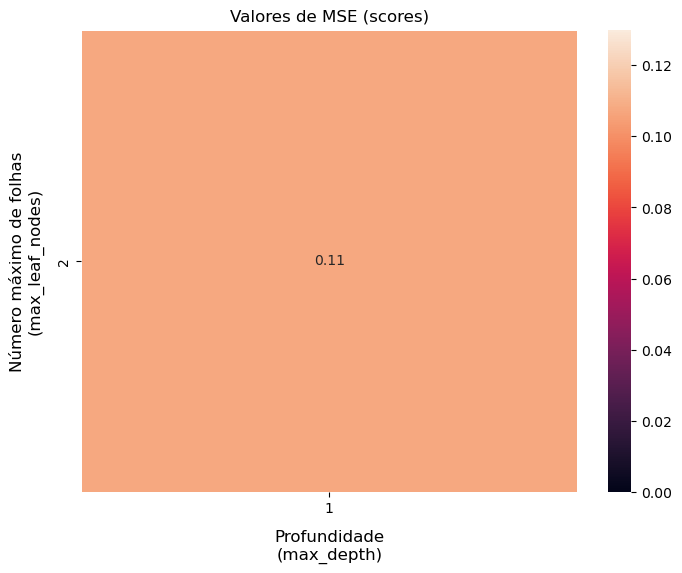

In [79]:
# Salvar em um dataframe todas as informações atreladas à busca em grade:
info_grid_search = pd.DataFrame.from_dict(grid_search.cv_results_)

# Criar um dataframe a fim de criar um mapa de calor
scores_df = pd.DataFrame()
scores_df['param_max_depth'] = pd.to_numeric(info_grid_search['param_max_depth'].values)
scores_df['param_max_leaf_nodes'] = pd.to_numeric(info_grid_search['param_max_leaf_nodes'].values)
scores_df['mean_test_score'] = -pd.to_numeric(info_grid_search['mean_test_score'].values)
scores_df = scores_df.pivot(index='param_max_leaf_nodes', columns='param_max_depth', values='mean_test_score')


# Criar uma figura do tipo mapa de calor (heatmap)
# A figura do tipo mapa de calor (heatmap) vai auxiliar na visualização das métricas atreladas a cada combinação da busca em grade:
plt.figure(figsize=(8,6))
ax = sns.heatmap(scores_df, annot=True, fmt=".2f", linewidths=0.6, vmin=0.0, vmax=0.13, cbar=True)
ax.set_title('Valores de MSE (scores)', fontsize=12)
ax.set_ylabel(ylabel='Número máximo de folhas\n(max_leaf_nodes)', fontsize=12, labelpad=10)
ax.set_xlabel(xlabel='Profundidade\n(max_depth)', fontsize=12, labelpad=10)
plt.show()

In [80]:
# Instanciar o tipo de modelo de predicao - arvore de decisao para regressao
max_depth = 1
max_leaf_nodes = 2
model = DecisionTreeRegressor(max_depth=max_depth, max_leaf_nodes=max_leaf_nodes, random_state=50)

# Treinar o modelo
model.fit(X_train_norm, y_train_norm)

DecisionTreeRegressor(max_depth=1, max_leaf_nodes=2, random_state=50)

### Avaliacao da capacidade de generalizacao do modelo de predicao

In [81]:
# Estimar a capacidade de generalizacao do modelo de predicao
y_pred_test_norm = model.predict(X_test_norm)
mse = mean_squared_error(y_test_norm, y_pred_test_norm)
mse = np.round(mse, 4)

print(f'Capacidade de generalizacao do modelo\nValor da metrica de desempenho (MSE) = {mse}')

Capacidade de generalizacao do modelo
Valor da metrica de desempenho (MSE) = 0.1181
